In [67]:
import pandas as pd 
import numpy as np 
import plotly as pl 
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt 

In [68]:
data = pd.read_parquet('../data/clean/agaricus-lepiota.parquet')
df = data.copy()

Todas las variables son categóricas nominales

Análisis univariado

(array([0, 1]), [Text(0, 0, 'edible'), Text(1, 0, 'poisonous')])

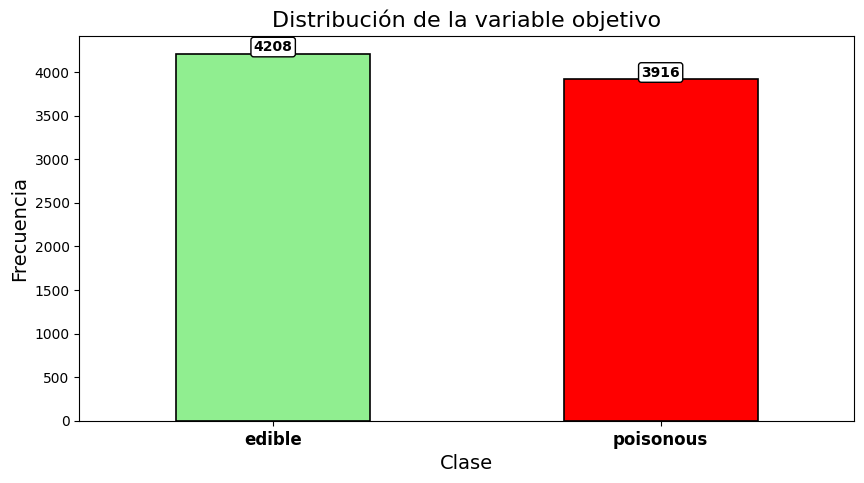

In [69]:
#Variable objetivo
distribucion_VO = df['poisonus'].value_counts()
distribucion_VO.plot(kind='bar',color=['lightgreen','red'],edgecolor='black',linewidth=1.2,figsize=(10,5),)
plt.title('Distribución de la variable objetivo',fontsize=16)
for index, value in enumerate(distribucion_VO):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10,color='black',fontweight='bold', 
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
plt.xlabel('Clase',fontsize=14)
plt.ylabel('Frecuencia',fontsize=14)
plt.xticks(rotation=0,fontsize=12,fontweight='bold',color='black')

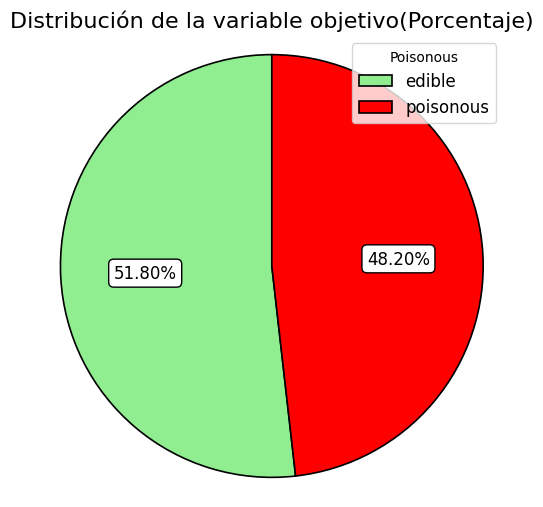

In [70]:
distribucion_VO.plot(
                        kind='pie',
                        autopct='%1.2f%%',colors=['lightgreen','red'],
                        startangle=90,
                        labels=None,
                        figsize=(6,6),
                        textprops={'fontsize': 12,'bbox':dict(boxstyle='round,pad=0.3',facecolor='white',edgecolor='black')}, 
                        wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
                        )
plt.legend(
    title='Poisonous', 
    loc='upper right', 
    labels=['edible', 'poisonous'], 
    fontsize=12
    )

plt.title('Distribución de la variable objetivo(Porcentaje)',fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.show()

Demás variables

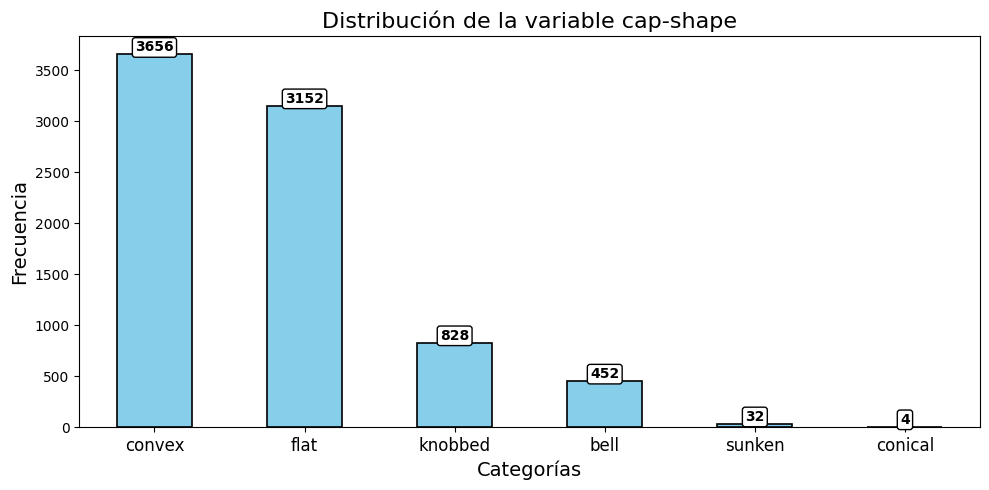

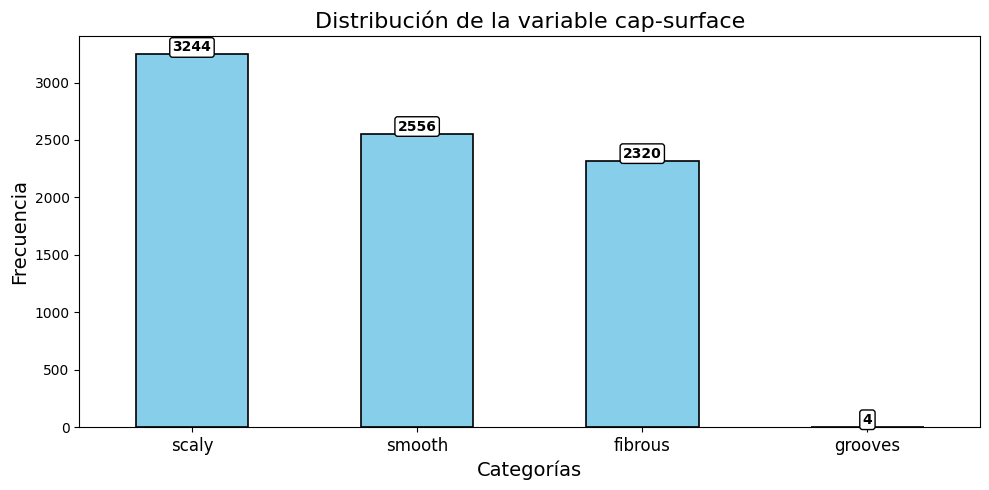

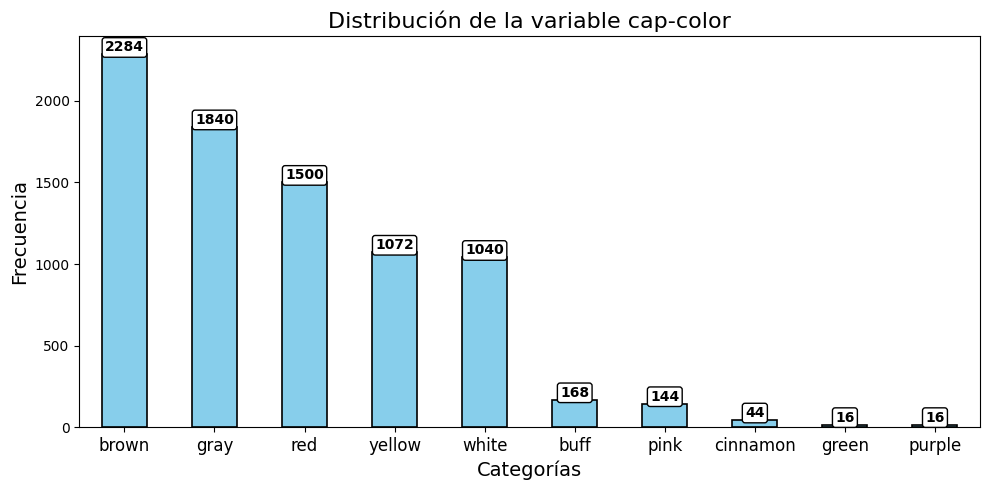

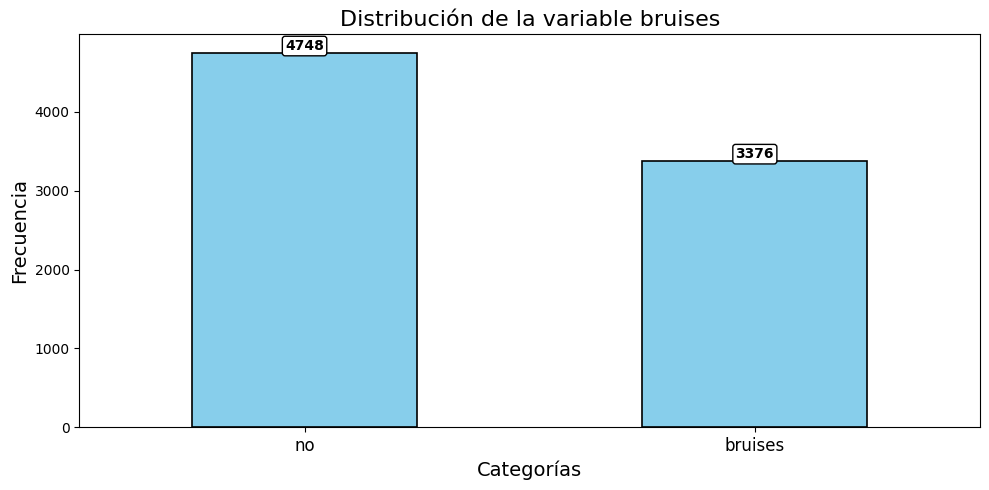

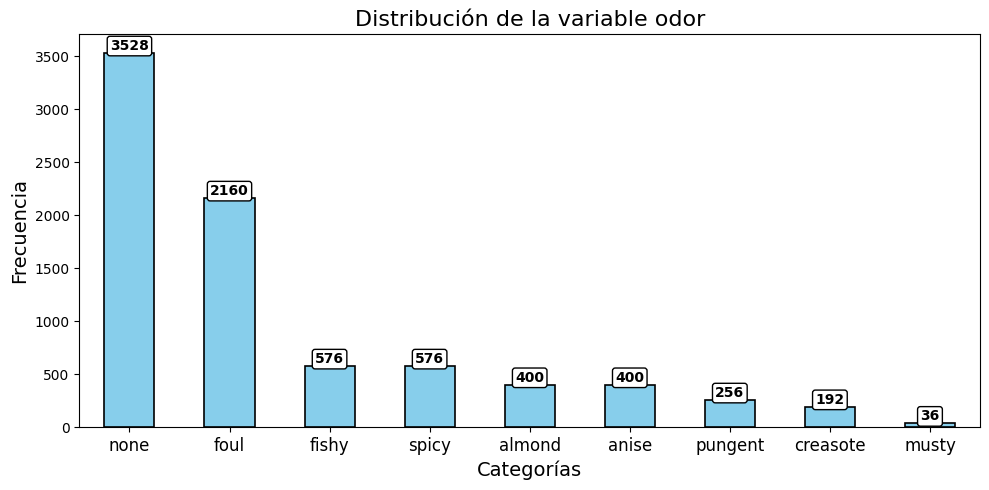

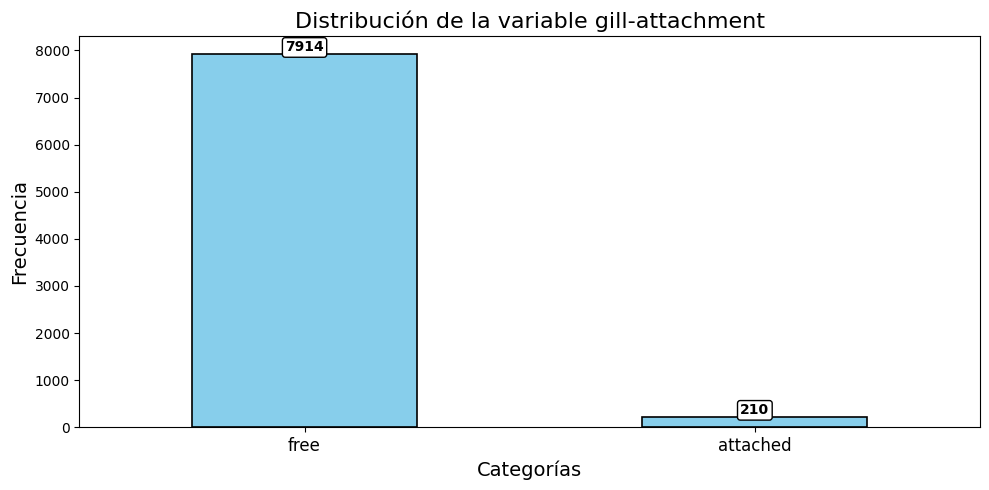

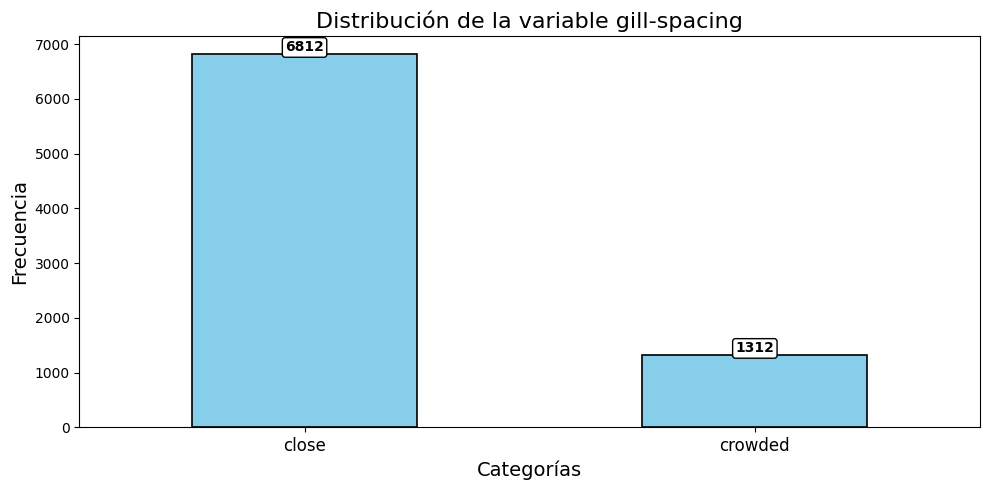

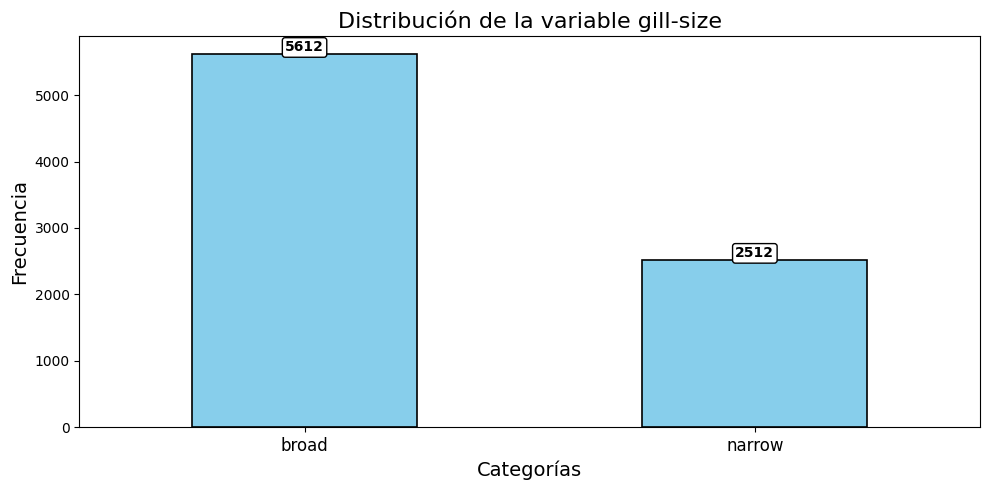

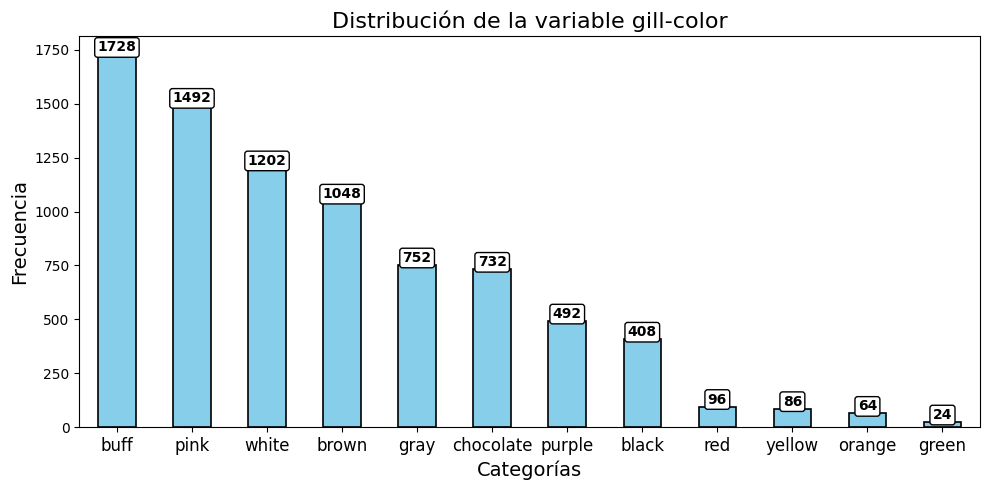

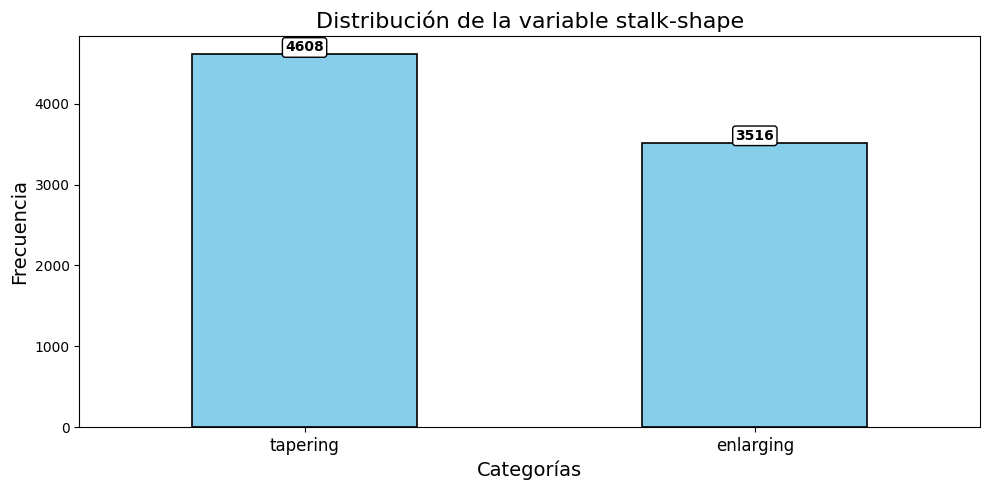

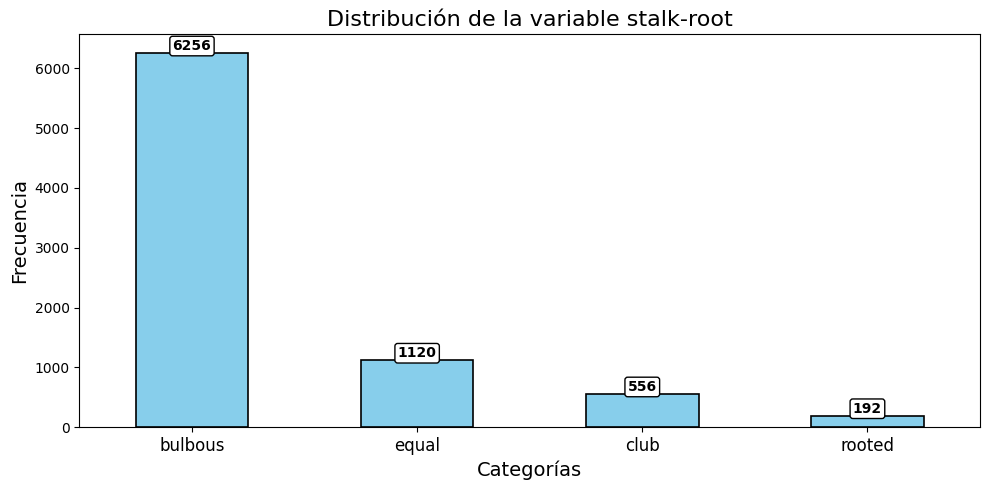

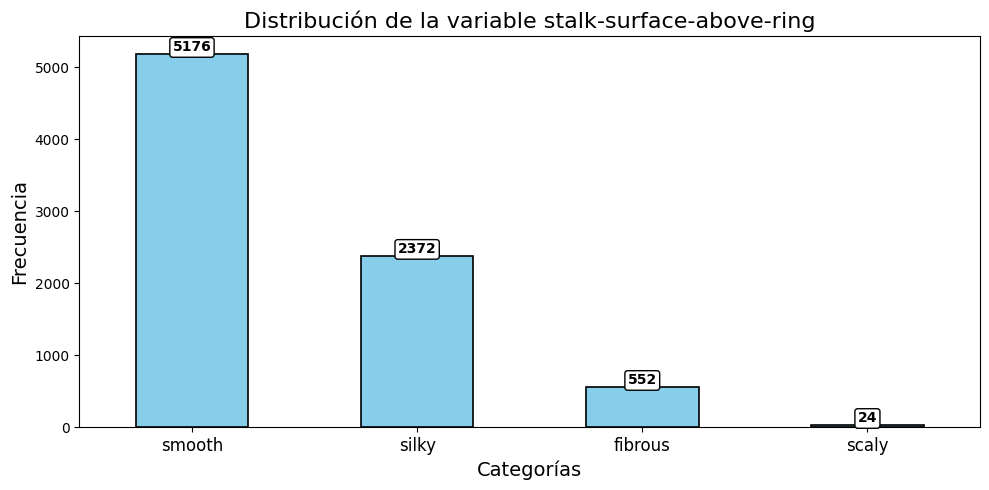

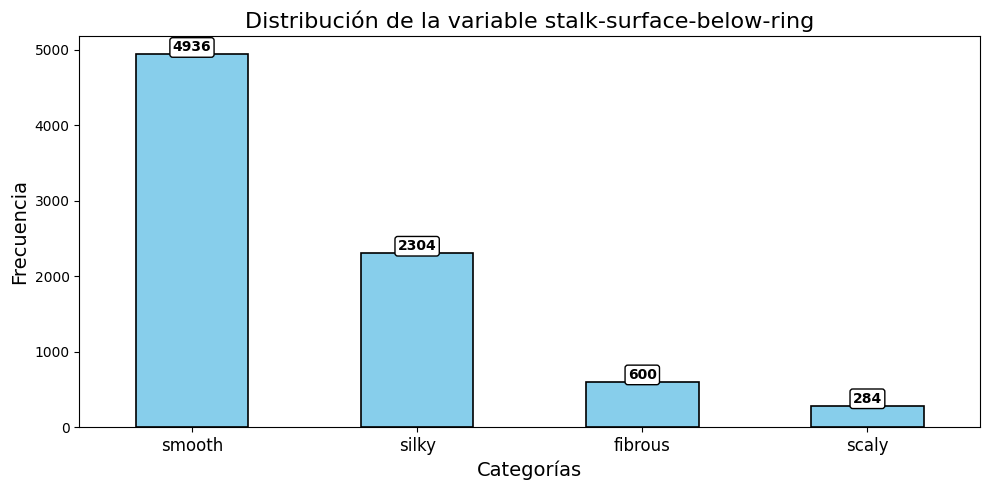

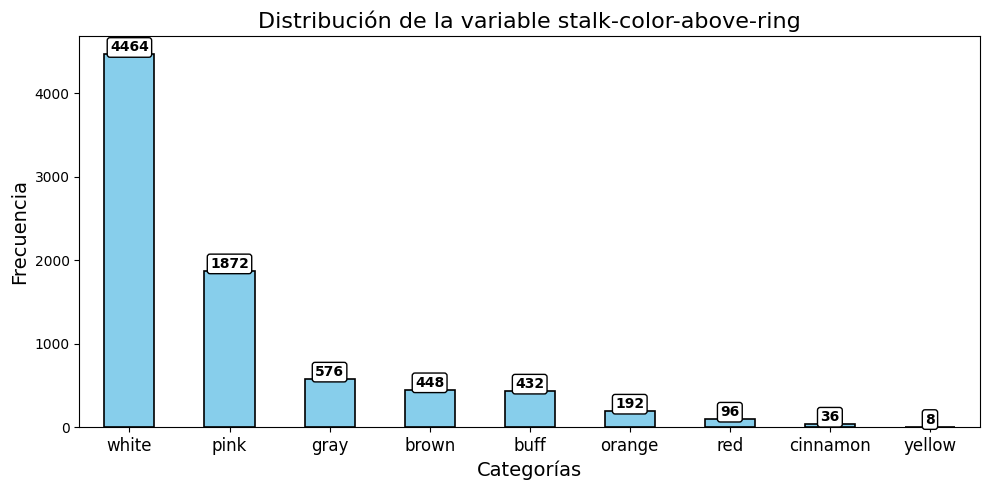

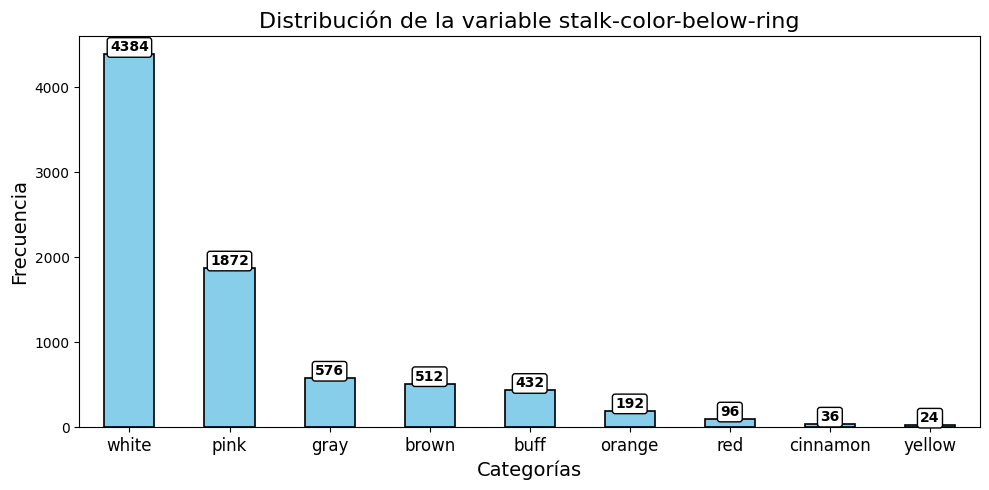

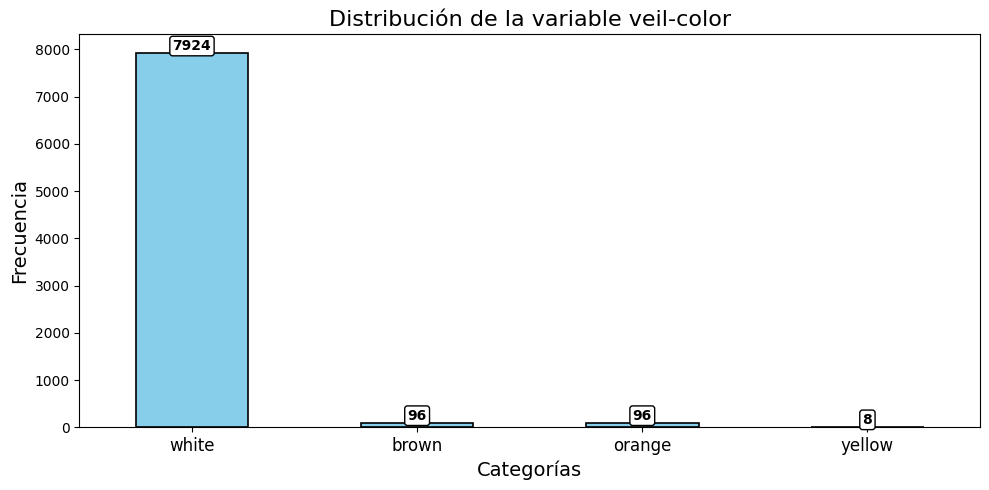

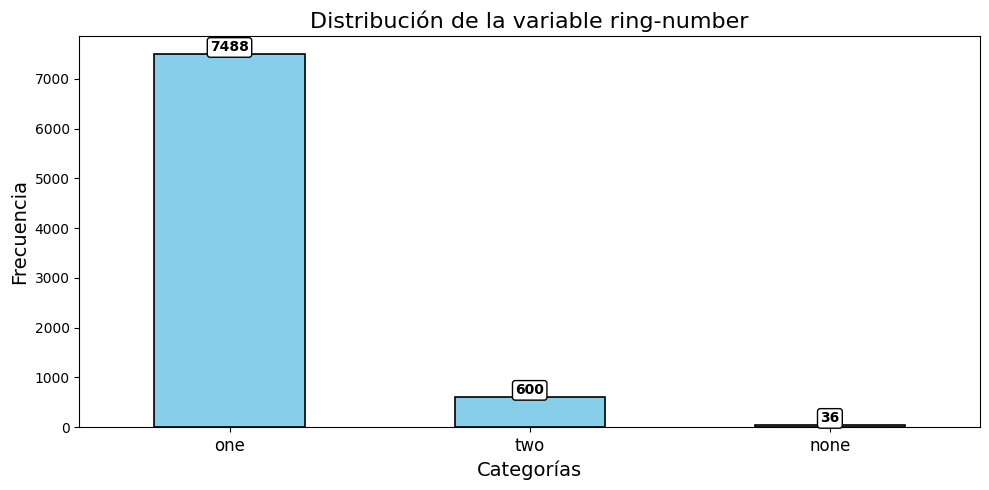

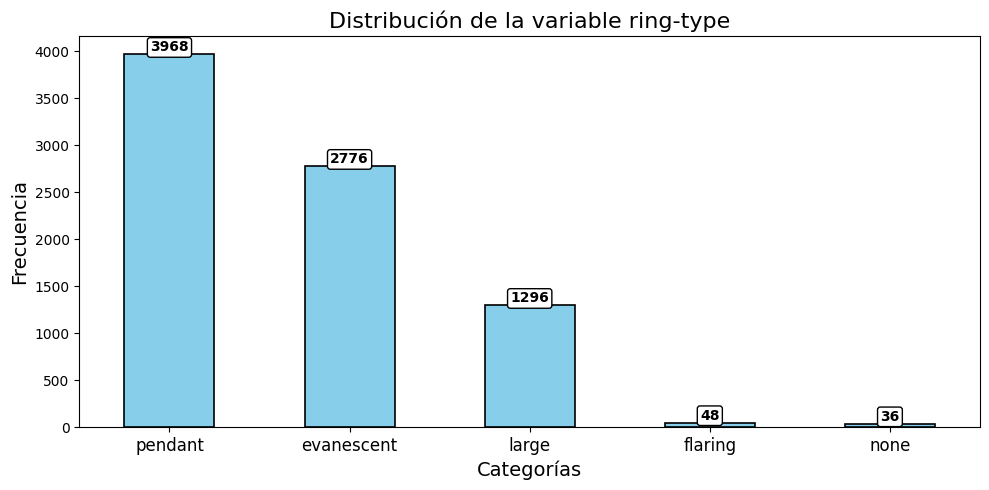

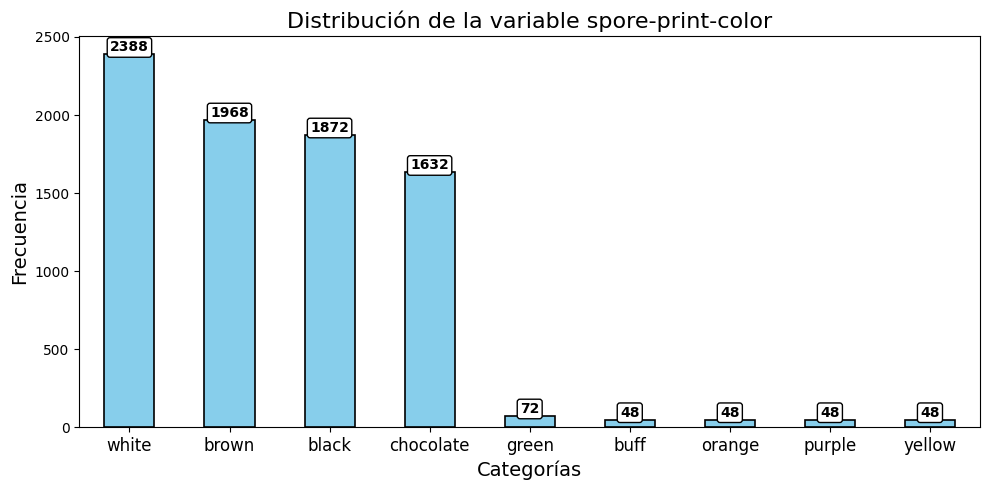

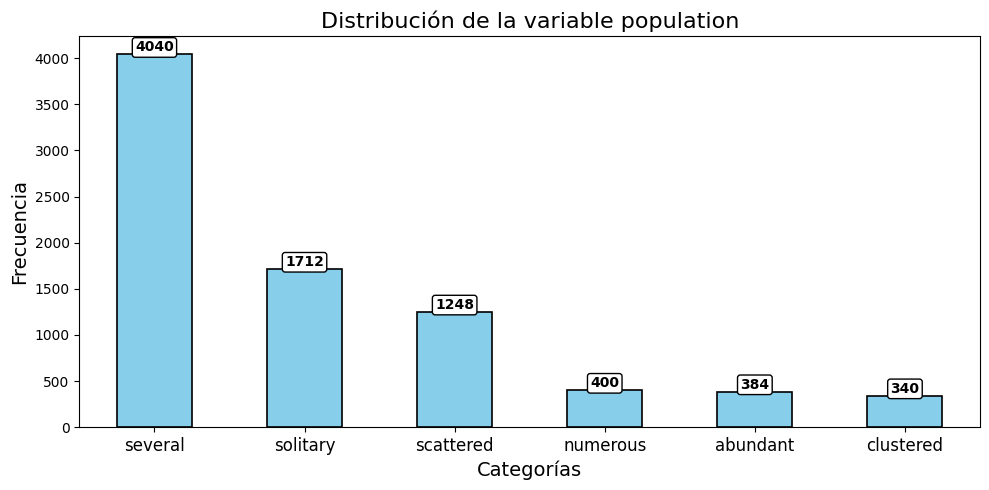

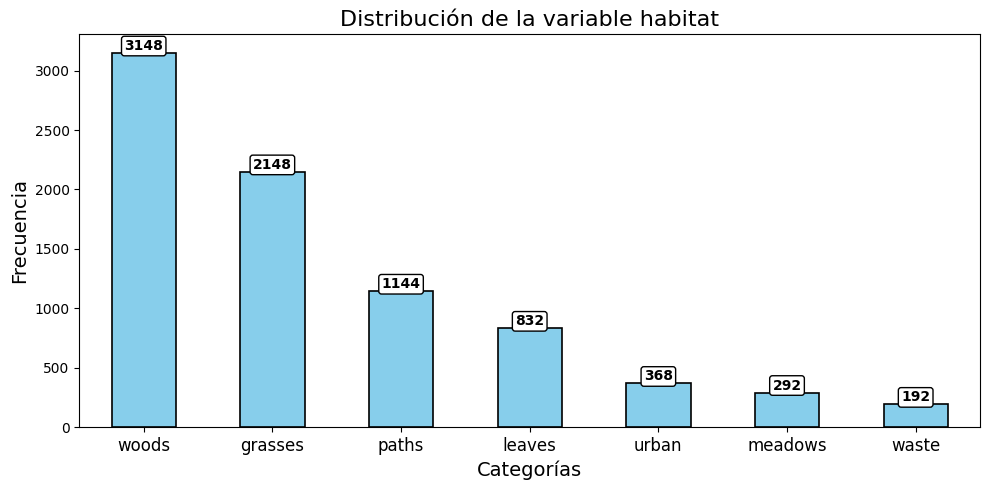

In [71]:
df_no_objetivo = df.drop(columns=['poisonus']) 

for column in df_no_objetivo.columns:
    counts = df_no_objetivo[column].value_counts()
    plt.figure(figsize=(10, 5))
    ax = counts.plot(
        kind='bar',
        color='skyblue',
        edgecolor='black',
        linewidth=1.2
    )
    plt.title(f'Distribución de la variable {column}', fontsize=16)
    plt.xlabel('Categorías', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    
    for index, value in enumerate(counts):
        ax.text(
            index, value,
            str(value),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
        )
    
    plt.tight_layout()
    plt.show()



Análisis bivariado con respecto a la variable objetivo

In [72]:
for column in df_no_objetivo.columns:
    print(f'Relación entre {column} y la variable objetivo:')
    print(pd.crosstab(df_no_objetivo[column], df['poisonus'],normalize='index')*100)

Relación entre cap-shape y la variable objetivo:
poisonus       edible   poisonous
cap-shape                        
bell        89.380531   10.619469
conical      0.000000  100.000000
convex      53.282276   46.717724
flat        50.634518   49.365482
knobbed     27.536232   72.463768
sunken     100.000000    0.000000
Relación entre cap-surface y la variable objetivo:
poisonus        edible   poisonous
cap-surface                       
fibrous      67.241379   32.758621
grooves       0.000000  100.000000
scaly        46.362515   53.637485
smooth       44.757433   55.242567
Relación entre cap-color y la variable objetivo:
poisonus       edible  poisonous
cap-color                       
brown       55.341506  44.658494
buff        28.571429  71.428571
cinnamon    72.727273  27.272727
gray        56.086957  43.913043
green      100.000000   0.000000
pink        38.888889  61.111111
purple     100.000000   0.000000
red         41.600000  58.400000
white       69.230769  30.769231
yellow

<Figure size 600x400 with 0 Axes>

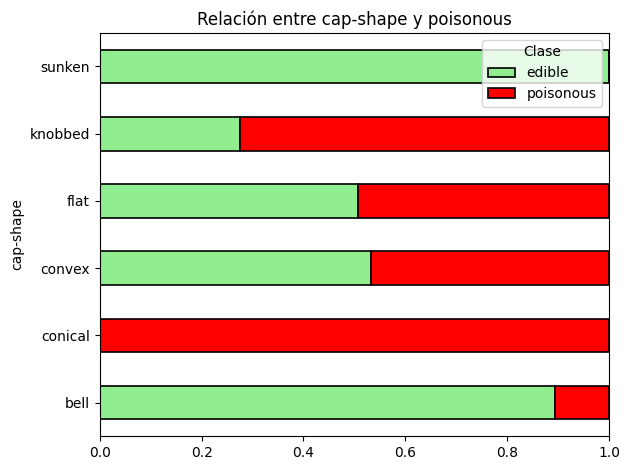

<Figure size 600x400 with 0 Axes>

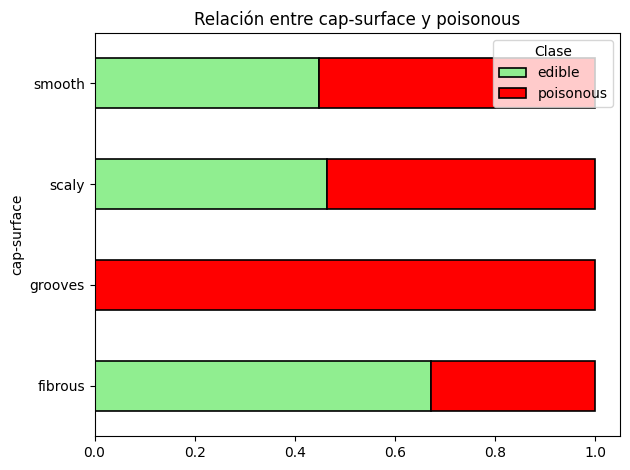

<Figure size 600x400 with 0 Axes>

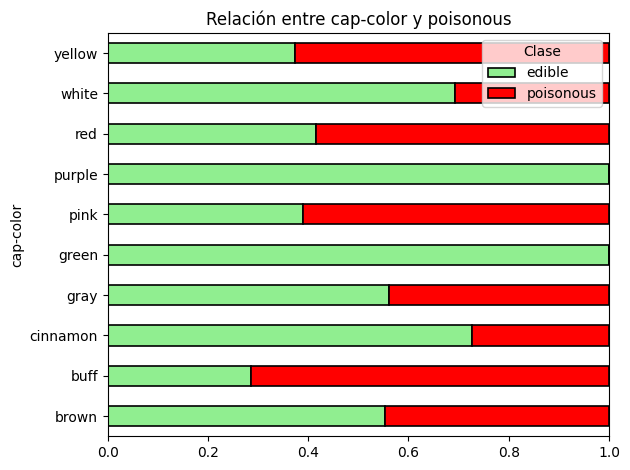

<Figure size 600x400 with 0 Axes>

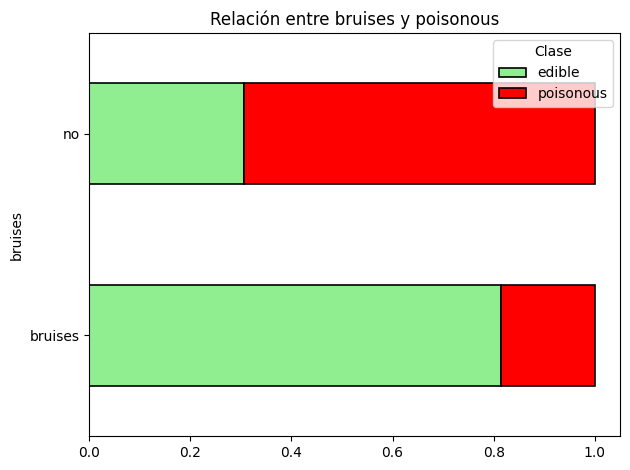

<Figure size 600x400 with 0 Axes>

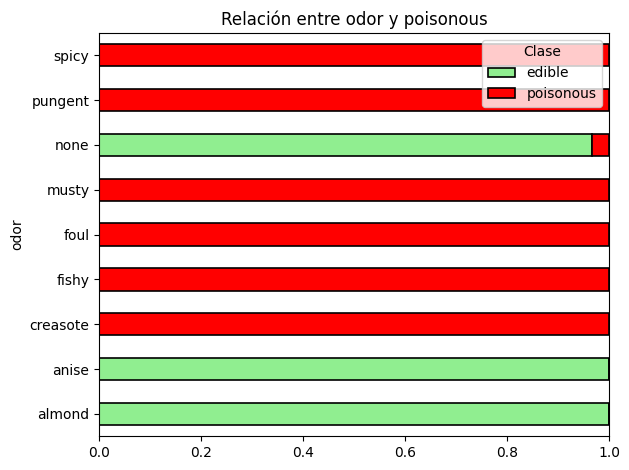

<Figure size 600x400 with 0 Axes>

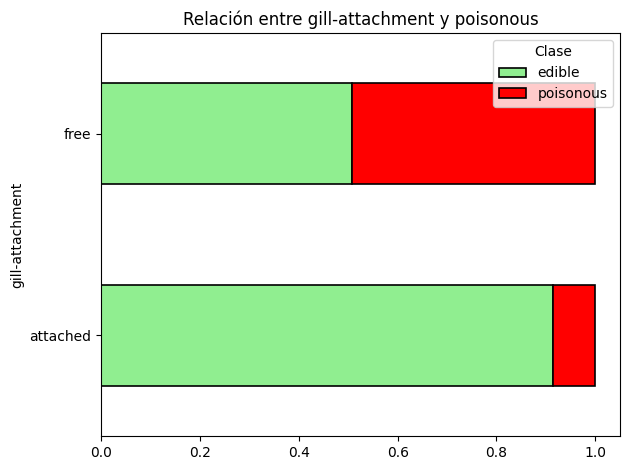

<Figure size 600x400 with 0 Axes>

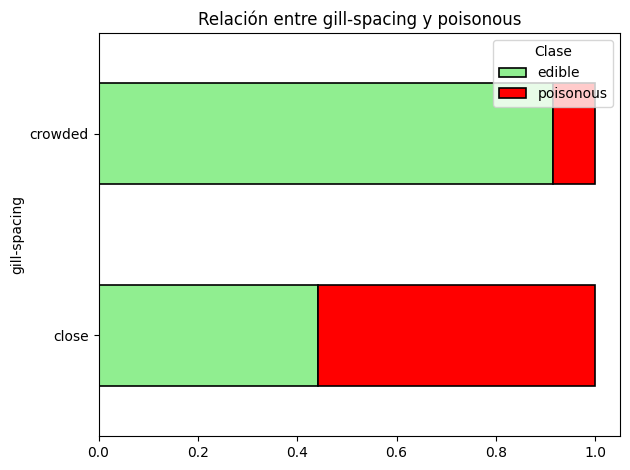

<Figure size 600x400 with 0 Axes>

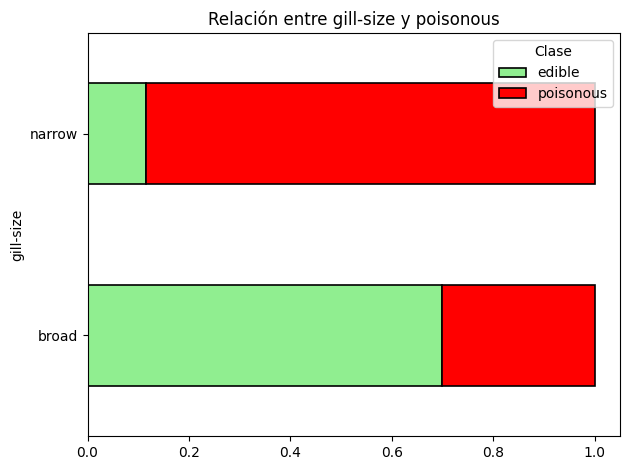

<Figure size 600x400 with 0 Axes>

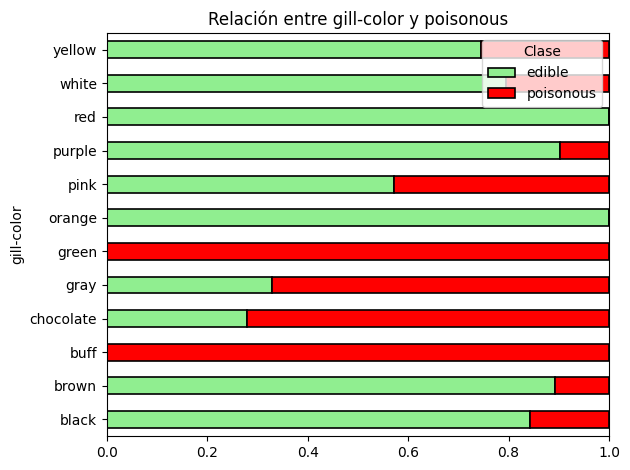

<Figure size 600x400 with 0 Axes>

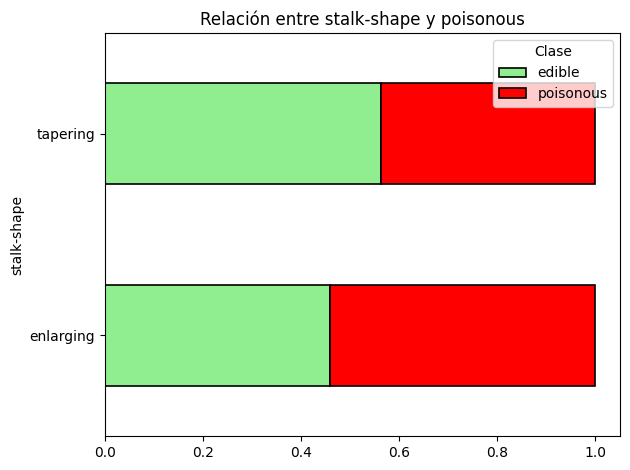

<Figure size 600x400 with 0 Axes>

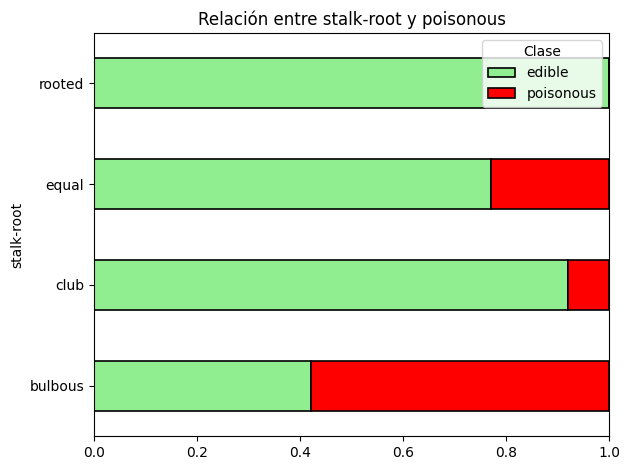

<Figure size 600x400 with 0 Axes>

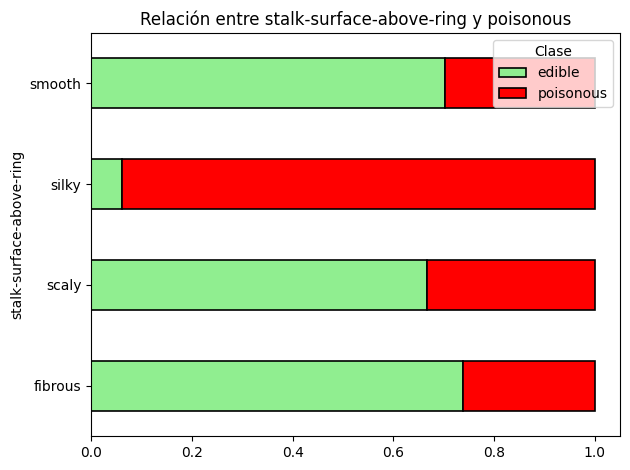

<Figure size 600x400 with 0 Axes>

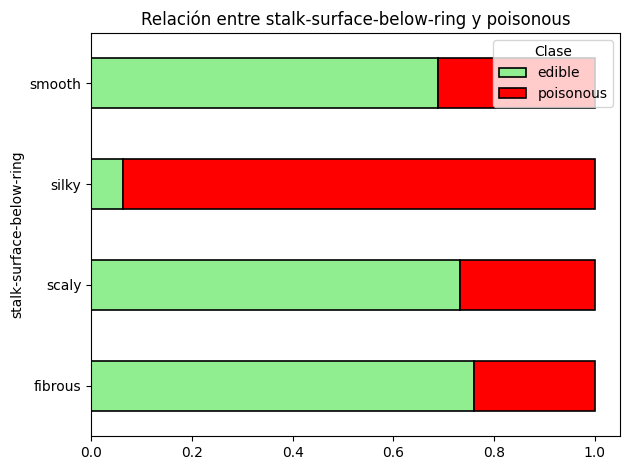

<Figure size 600x400 with 0 Axes>

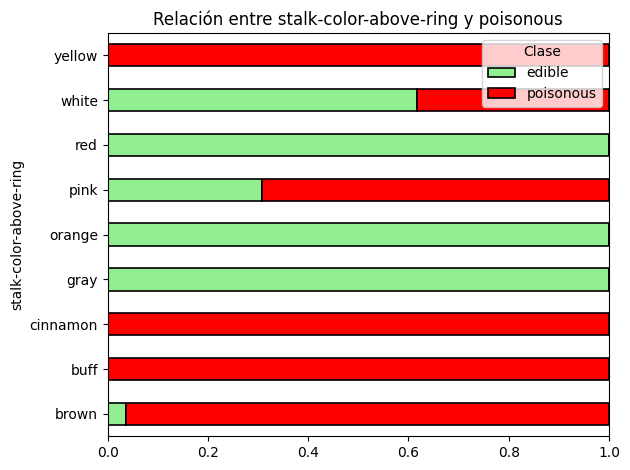

<Figure size 600x400 with 0 Axes>

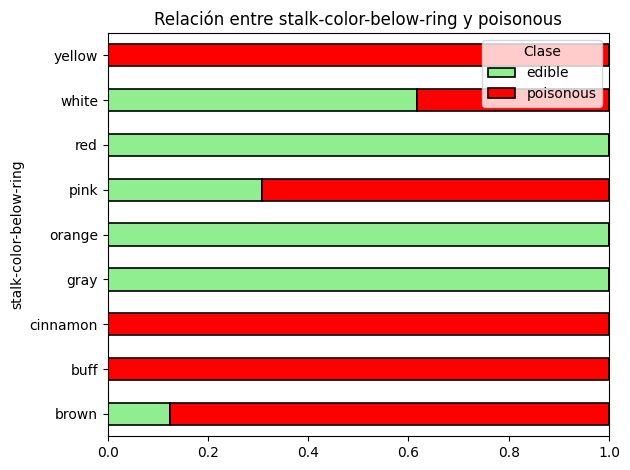

<Figure size 600x400 with 0 Axes>

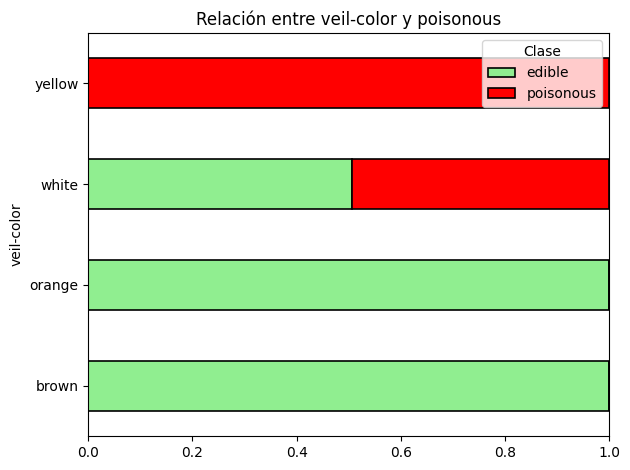

<Figure size 600x400 with 0 Axes>

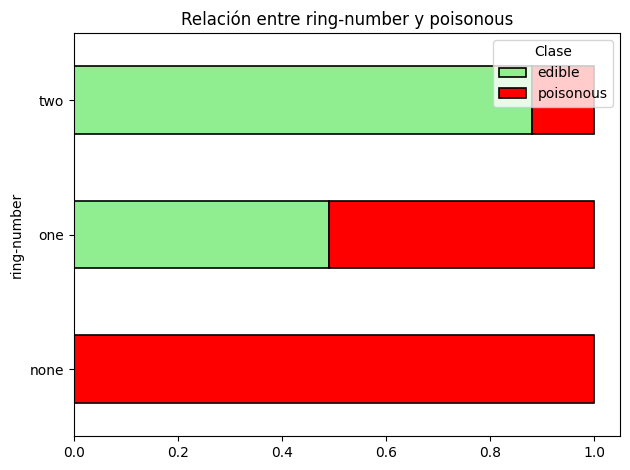

<Figure size 600x400 with 0 Axes>

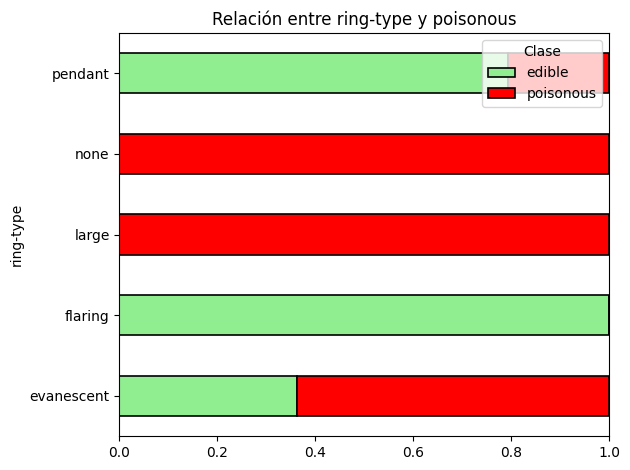

<Figure size 600x400 with 0 Axes>

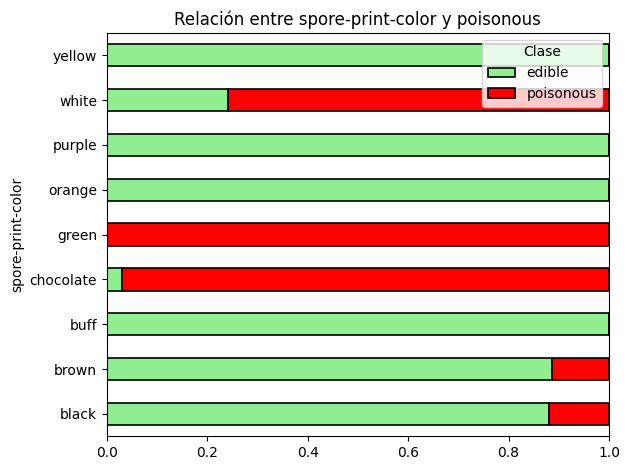

<Figure size 600x400 with 0 Axes>

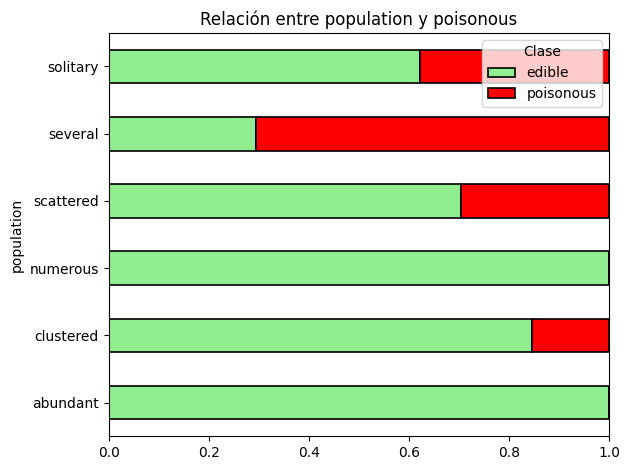

<Figure size 600x400 with 0 Axes>

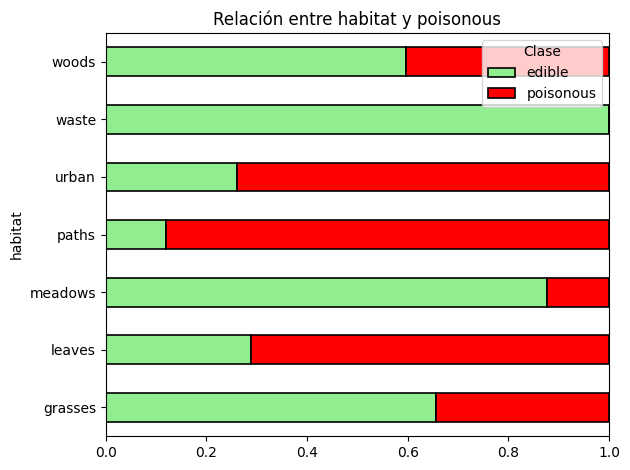

In [73]:
for column in df_no_objetivo.columns:
    
    tabla = pd.crosstab(
        df[column],
        df['poisonus'],
        normalize='index'
    )
    
    plt.figure(figsize=(6,4))
    tabla.plot(kind='barh', stacked=True, color=['lightgreen','red'], edgecolor='black', linewidth=1.2)
    
    plt.title(f'Relación entre {column} y poisonous')
    plt.tight_layout()
    plt.legend(title='Clase', loc='upper right')
    plt.show()

Análisis multivariado

Ver fuerza de cada columna con respecto a la variable objetivo

In [74]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

resultados = {}

for column in df_no_objetivo.columns:
    tabla = pd.crosstab(df[column], df['poisonus'])
    resultados[column] = cramers_v(tabla)

cramers_df = pd.Series(resultados).sort_values(ascending=False)
print(cramers_df)

odor                        0.971005
spore-print-color           0.752645
gill-color                  0.680830
ring-type                   0.603271
stalk-surface-above-ring    0.587944
stalk-surface-below-ring    0.574837
gill-size                   0.539758
stalk-color-above-ring      0.524850
stalk-color-below-ring      0.514725
bruises                     0.501280
population                  0.487376
habitat                     0.440136
stalk-root                  0.361068
gill-spacing                0.348052
cap-shape                   0.245571
cap-color                   0.218427
ring-number                 0.214772
cap-surface                 0.196925
veil-color                  0.153421
gill-attachment             0.128424
stalk-shape                 0.101770
dtype: float64


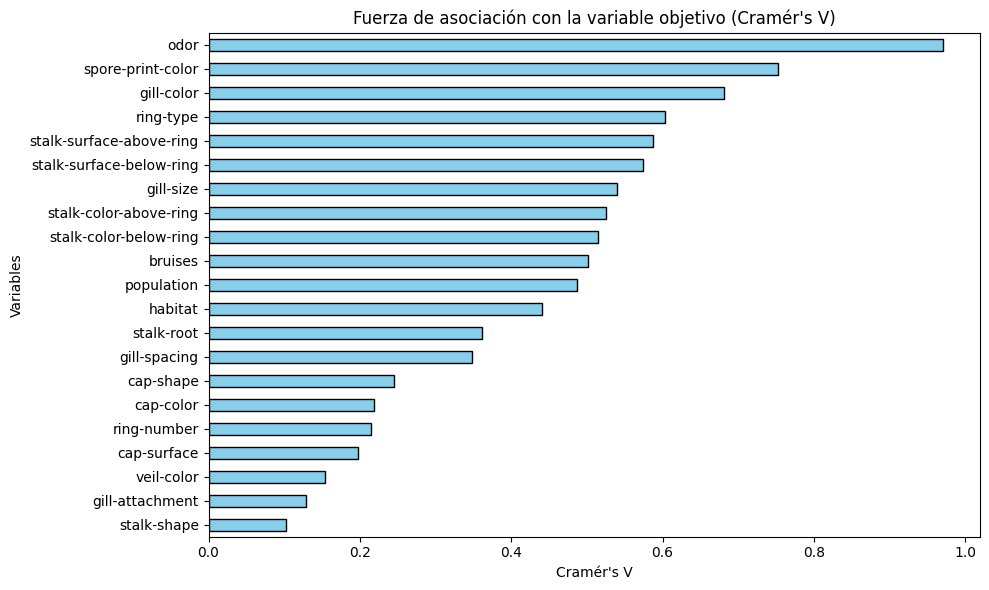

In [75]:
plt.figure(figsize=(10,6))

cramers_df.sort_values().plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

plt.title("Fuerza de asociación con la variable objetivo (Cramér's V)")
plt.xlabel("Cramér's V")
plt.ylabel("Variables")

plt.tight_layout()
plt.show()

Conclusiones